# Нормализация (Max-Min Normalization, Min-Max Scaling)
 – техника преобразования значений признака (Feature), масштабирующая значения таким образом, что они располагаются в диапазоне от 0 до 1. Вычисляется каждый нормализованный элемент признака с помощью формулы.
 Цель такого преобразования – изменить значения числовых столбцов в наборе данных так, чтобы сохранить различия их диапазонов. В Машинном обучении (Machine Learning) Датасет (Dataset) требует нормализации, когда признаки имеют разные диапазоны и тем самым способствуют искажению восприятия взаимоотношений между Переменными-предикторами (Predictor Variable) и Целевой переменной (Target Variable).
 Нормализация и SkLearn
Нормализовать можно с помощью функции SkLearn. Импортируем MinMaxScaler библиотеки Scikit-learn:


In [1]:
import pandas as pd

import sklearn
from sklearn.preprocessing import MinMaxScaler

Библиотеки быстро эволюционируют, потому указывается рабочая версия, с которой работал автор на момент написания статьи. Для быстрого дебаггинга используйте команду для установки явной версии '!pip install [библиотека]==[версия]'.

In [2]:
print(pd.__version__)
print(sklearn.__version__)

1.3.4
0.24.2


In [3]:
# Импортируем датасет, разделителем  является точка с запятой (sep = ';'):
df = pd.read_csv('https://www.dropbox.com/s/62xm9ymoaunnfg6/bank-full.csv?dl=1', sep = ';')
df.head()

,Возраст,Работа,Семейный статус,Образование,Кредитный дефолт,Ипотека,Займ,Контакт,Месяц,День недели,...,Кампания,День,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
0,27,Самозанятый,Не женат / не замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Нет
1,30,Преддприниматель,Женат / замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да
2,39,Голубой воротничок,Женат / замужем,Базовое (9 классов),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да
3,42,Менеджер,Женат / замужем,Высшая школа,Нет,Да,Да,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да
4,42,Самозанятый,Женат / замужем,Базовое (4 класса),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.8,Да


In [4]:
#Определим, какие признаки являются числовыми, чтобы впоследствии их нормализовать:
df.dtypes

Возраст                                 int64
Работа                                 object
Семейный статус                        object
Образование                            object
Кредитный дефолт                       object
Ипотека                                object
Займ                                   object
Контакт                                object
Месяц                                  object
День недели                            object
Длительность                            int64
Кампания                                int64
День                                    int64
Предыдущий контакт                      int64
Доходность                             object
Колебание уровня безработицы          float64
Индекс потребительских цен            float64
Индекс потребительской уверенности    float64
Европейская межбанковская ставка      float64
Количество сотрудников в компании     float64
y                                      object
dtype: object

Для простоты восприятия сузим датасет и создадим его копию, состоящую только из признаков, выраженных числами:

In [6]:
# Выберем встретившиеся числовые типы
numerics = ['int64', 'float64']

# Создадим копию датасета
newdf = df.select_dtypes(include = numerics)

Теперь приступим непосредственно к нормализации:

In [7]:
# Инициализация нормализатора
scaler = MinMaxScaler()

# Передача датасета и преобразование
scaler.fit(newdf)
scaled_features = scaler.transform(newdf)

# Конвертация в табличный формат
df_MinMax = pd.DataFrame(data = scaled_features, 
columns = ["Возраст", 
          "Длительность",
          "Кампания",
          "День",
          "Предыдущий контакт", 
          "Колебание уровня безработицы", 
          "Индекс потребительских цен",
          "Индекс потребительской уверенности",
          "Европейская межбанковская ставка",
          "Количество сотрудников в компании"])

df_MinMax.head()

,Возраст,Длительность,Кампания,День,Предыдущий контакт,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании
0,0.123457,0.004880,0.0,1.0,0.0,0.6875,0.622369,0.435146,1.0,0.877883
1,0.160494,0.045344,0.0,1.0,0.0,0.6875,0.622369,0.435146,1.0,0.877883
2,0.271605,0.054900,0.0,1.0,0.0,0.6875,0.622369,0.435146,1.0,0.877883
3,0.308642,0.020943,0.0,1.0,0.0,0.6875,0.622369,0.435146,1.0,0.877883
4,0.308642,0.097194,0.0,1.0,0.0,0.6875,0.622369,0.435146,1.0,0.877883


Результирующий нормализованный датасет приобрел следующий вид и готов к дальнейшей обработке и загрузке в Модель (Model):

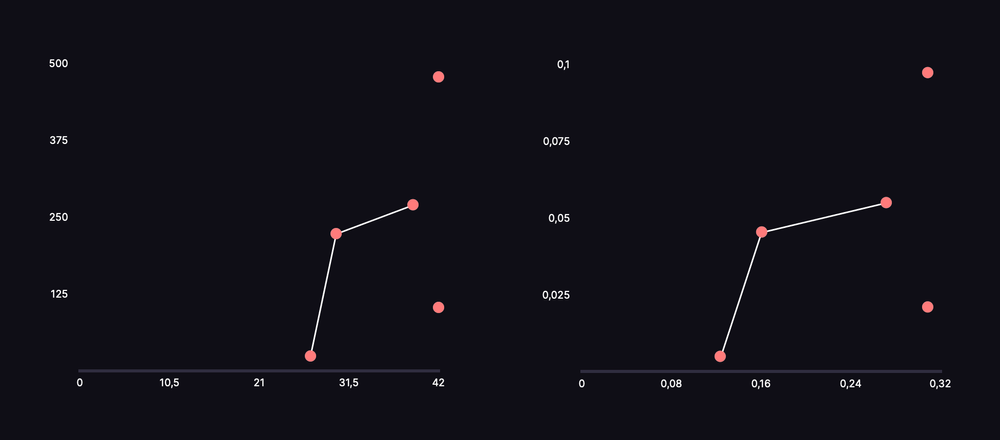

Нормализация и стандартизация
Стандартизация (Standartization) является разновидностью нормализации с использованием Стандартизованной оценки (Z-Score) и как бы центрирует наблюдения относительно нуля. Расстояние от нуля, то есть Дисперсия случайной величины (Variance) не превышает единицы:

In [ ]:
# Исходные данные
[[0, 0], [0, 0], [1, 1], [1, 1]]

# Стандартизованные данные
[[-1, -1], [-1, -1], [1, 1], [1, 1]]